In [4]:
import censusScrape
from censusScrape import codes, tracts
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#tracts = pd.read_csv("2019_Gaz_tracts_national.txt", delimiter='\t', dtype=str).groupby(by="USPS")

In [46]:
tracts.get_group("AL").head()

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,01001020100,9817813,28435,3.791,0.011,32.4819591,-86.4913377 ...
1,AL,01001020200,3325680,5669,1.284,0.002,32.475758,-86.4724678 ...
2,AL,01001020300,5349273,9054,2.065,0.003,32.4740243,-86.4597033 ...
3,AL,01001020400,6384276,8408,2.465,0.003,32.4710304,-86.4448353 ...
4,AL,01001020500,11408866,43534,4.405,0.017,32.4589224,-86.4218265 ...


In [2]:
cn = censusScrape.census("e65848a4151cc08c06a88a2aee66683367563a1e")

In [12]:
x = np.linspace(2010, 2018, num=100)

In [6]:
dat = cn.get_tract_data_for_state(state = '04', year=2010, data_names={"DP05_0001E":"Total Population"})

In [13]:
dat[1]

['Census Tract 1051.03, Maricopa County, Arizona',
 '3378',
 '04',
 '013',
 '105103']

In [17]:
for item in dat[1:3]:
    print(''.join(item[2:5]))

04013105103
04013105200


In [43]:
for t in dat[1:]:
    print(1000000*int(t[1])/int(tracts.loc[tracts['GEOID'] == ''.join(t[2:5]),'ALAND'].values[0]))

341.93356649868934
1607.8163240907156
2001.7182588209153
1492.6302839657092
1946.3379035138114
2184.9246451060344
4444.479692915322
3203.1283471405927
4779.590134839159
2493.064392926562
3067.803257545106
2511.307795881087
2019.9280095659365
2535.092249190179
2544.9638570576867
3237.5904761499983
2521.984676291152
1355.8211256746338
1889.7769372017553
1087.0641371849288
2449.6146690660407
2611.053791984775
1502.4220841832716
5599.173064631943
2089.730598768645
1777.3955644278726
7920.577997351273
1962.1753057550225
2986.345502400133
2393.829718809841
3220.451182575546
4046.309405230941
3356.9221691663847
4078.330552829192
2459.5756280674314
2865.09900990099
1565.4897836941498
2250.2930188264595
2229.773182474243
1433.9121170347232
544.7668143338478
514.0053277121365
950.3377982953497
1291.9247130184829
2059.5027395817547
1401.9360027450978
2343.3446013839607
1856.3181995792295
1893.9700900909245
2515.5132335013177
3528.667826988866
2251.2575074863066
1855.0131096676744
2781.22001436899

IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
dat = cn.get_data_all_years_from_coord([-121.0, 37.0], data_names={"DP05_0001E":"Total Population"})

In [10]:
dat

{2010: {'NAME': 'Census Tract 21, Merced County, California',
  'Total Population': '3653',
  'state': '06',
  'county': '047',
  'tract': '002100'},
 2011: {'NAME': 'Census Tract 21, Merced County, California',
  'Total Population': '3683',
  'state': '06',
  'county': '047',
  'tract': '002100'},
 2012: {'NAME': 'Census Tract 21, Merced County, California',
  'Total Population': '3549',
  'state': '06',
  'county': '047',
  'tract': '002100'},
 2013: {'NAME': 'Census Tract 21, Merced County, California',
  'Total Population': '3635',
  'state': '06',
  'county': '047',
  'tract': '002100'},
 2014: {'NAME': 'Census Tract 21, Merced County, California',
  'Total Population': '3589',
  'state': '06',
  'county': '047',
  'tract': '002100'},
 2015: {'NAME': 'Census Tract 21, Merced County, California',
  'Total Population': '3826',
  'state': '06',
  'county': '047',
  'tract': '002100'},
 2016: {'NAME': 'Census Tract 21, Merced County, California',
  'Total Population': '4229',
  'state

In [17]:
dat = cn.get_data_spline_from_coord([-121.0, 37.0], data_names = {"DP05_0001PE":"percent", "DP05_0001E":"total"})
print(dat)

{'NAME': 'Census Tract 21, Merced County, California', 'percent': <scipy.interpolate._cubic.PchipInterpolator object at 0x0000019C39FA6EB8>, 'total': <scipy.interpolate._cubic.PchipInterpolator object at 0x0000019C39FA6FC0>, 'state': '06', 'county': '047', 'tract': '002100'}


In [12]:
dat

{'NAME': 'Census Tract 20, Coconino County, Arizona',
 'Total Population': <scipy.interpolate._cubic.PchipInterpolator at 0x20128d7aba0>,
 'photographers': None,
 'state': '04',
 'county': '005',
 'tract': '002000'}

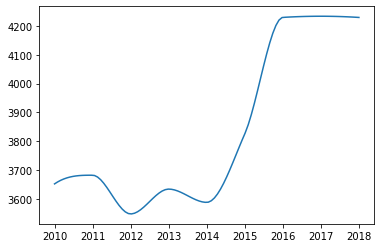

In [18]:
plt.plot(x, dat["percent"](x))

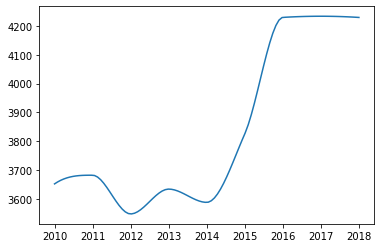

In [19]:
plt.plot(x,dat["total"](x))